# Test Recon vs. Inpainting

In [15]:
# imports
from importlib import reload
import numpy as np
import os

import h5py

import pandas
from skimage.restoration import inpaint as sk_inpaint

import seaborn as sns
from matplotlib import pyplot as plt

from ulmo.mae import bias
from ulmo.mae import mae_utils
from ulmo import io as ulmo_io
from ulmo.plotting import plotting 

# Load up 

In [2]:
enki_path = os.path.join(os.getenv('OS_OGCM'), 'LLC', 'Enki')

In [5]:
orig_file = os.path.join(enki_path, 'PreProc', 'MAE_LLC_valid_nonoise_preproc.h5')
f_orig = h5py.File(orig_file, 'r')

In [4]:
t, p = 10, 10
recon_file = mae_utils.img_filename(t,p, local=True)
f_recon = h5py.File(recon_file,'r')

In [9]:
reload(mae_utils)
mask_file = mae_utils.mask_filename(t,p, local=True)
f_mask = h5py.File(mask_file,'r')

# Test one

In [6]:
f_orig['valid'].shape

(655788, 1, 64, 64)

In [10]:
orig0 = f_orig['valid'][0,0,...]
recon0 = f_recon['valid'][0,0,...]
mask0 = f_mask['valid'][0,0,...]

In [11]:
np.sum(mask0 == 1)/mask0.size

0.1015625

## Inpaint

In [14]:
inpaint0 = sk_inpaint.inpaint_biharmonic(orig0, mask0, channel_axis=None)

## Check them out

<Figure size 640x480 with 0 Axes>

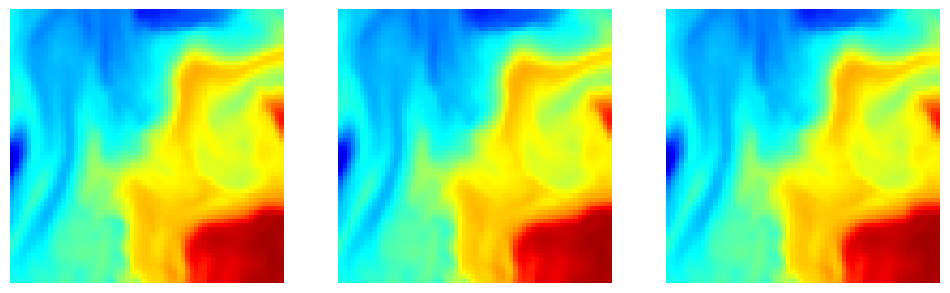

In [28]:
reload(plotting)
plt.clf()
#plt.figure(figsize=(12,8))
_, axs = plt.subplots(1, 3, figsize=(12,8))#, layout='constrained', sharex=True, sharey=True)

vmnx = [-1.,1.]
_ = plotting.show_image(orig0, ax=axs[0], set_aspect='equal', vmnx=vmnx, cbar=False)
_ = plotting.show_image(recon0, ax=axs[1], set_aspect='equal', vmnx=vmnx, cbar=False)
_ = plotting.show_image(inpaint0, ax=axs[2], set_aspect='equal', vmnx=vmnx, cbar=False)

#
plt.show()

## Diff me

In [29]:
diff_reco = recon0 - orig0
diff_inpaint = inpaint0 - orig0

<Figure size 640x480 with 0 Axes>

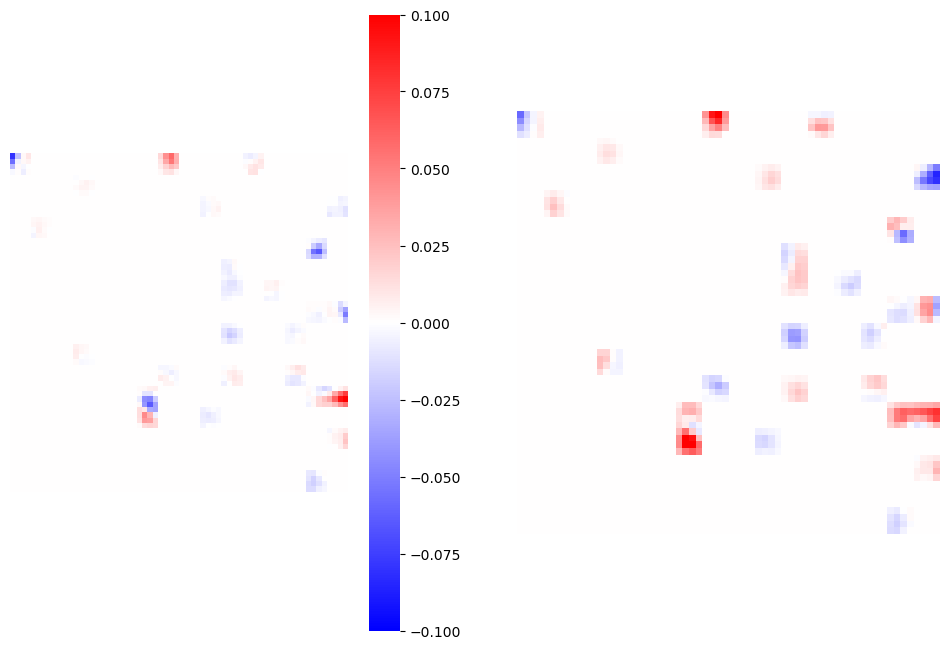

In [32]:
reload(plotting)
plt.clf()
#plt.figure(figsize=(12,8))
_, axs = plt.subplots(1, 2, figsize=(12,8))#, layout='constrained', sharex=True, sharey=True)

vmnx = [-0.1,0.1]
cm = 'bwr'
_ = plotting.show_image(diff_reco, ax=axs[0], set_aspect='equal', vmnx=vmnx, cbar=True, cm=cm)
_ = plotting.show_image(diff_inpaint, ax=axs[1], set_aspect='equal', vmnx=vmnx, cbar=False, cm=cm)
#_ = plotting.show_image(inpaint0, ax=axs[2], set_aspect='equal', vmnx=vmnx, cbar=False)

#
plt.show()

In [ ]:
np.std(diff_reco[